In [1]:
#Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv 
from IPython.display import Image, display
from PIL import Image as im

In [2]:
image = 'sign_language.jpg'

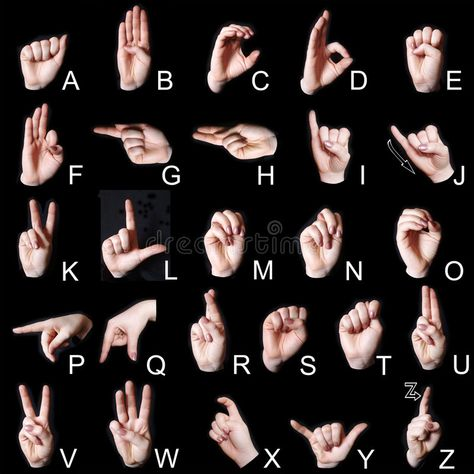

In [3]:
display(Image(image))

In [4]:
testset = pd.read_csv('sign_mnist_test.csv')
trainset =pd.read_csv('sign_mnist_train.csv')

In [5]:
trainset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [6]:
labels = trainset['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [7]:
trainset.drop('label', axis = 1, inplace = True)

In [8]:
#get into gray image
def to_gray_image(img):
    img = np.array(np.reshape(img , (28,28)) , dtype = np.uint8)
    img = im.fromarray(img)
    img.save("kimdien.png")
    img = cv.imread("kimdien.png")
    return img

In [9]:
#get into gray image
images = trainset.values
images = np.array([to_gray_image(i) for i in images])

In [10]:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
labels = labelbinarizer.fit_transform(labels)

In [11]:
#View label
print(labels.shape)
print(images.shape)

(27455, 24)
(27455, 28, 28, 3)


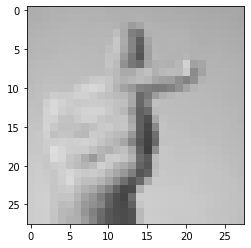

In [12]:
plt.imshow(images[19].reshape(28,28,3))

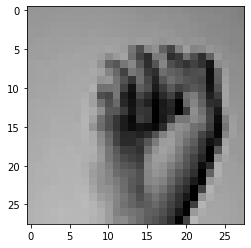

In [13]:
plt.imshow(images[20].reshape(28,28,3))

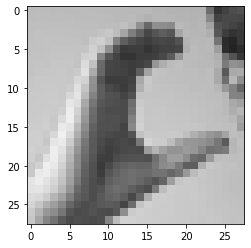

In [14]:
plt.imshow(images[2].reshape(28,28,3))

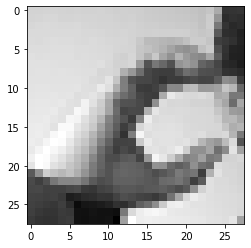

In [15]:
plt.imshow(images[3].reshape(28,28,3))

In [16]:
images = images /255

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten , Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam , SGD
batch_size = 5
num_classes = 24
epochs = 10

In [18]:
#Build model
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 , 3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#Input Layer
model.add(Flatten())
#Hidden Layer
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
#Output Layer
model.add(Dense(num_classes, activation = 'softmax'))

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

In [20]:
his = model.fit(images, labels, epochs = epochs, batch_size = batch_size)

Epoch 1/10
5491/5491 [==============================] - 12s 2ms/step - loss: 0.3829 - accuracy: 0.8814
Epoch 2/10
5491/5491 [==============================] - 13s 2ms/step - loss: 0.0286 - accuracy: 0.9915
Epoch 3/10
5491/5491 [==============================] - 13s 2ms/step - loss: 0.0197 - accuracy: 0.9940
Epoch 4/10
5491/5491 [==============================] - 12s 2ms/step - loss: 0.0147 - accuracy: 0.9954
Epoch 5/10
5491/5491 [==============================] - 12s 2ms/step - loss: 0.0123 - accuracy: 0.9966
Epoch 6/10
5491/5491 [==============================] - 13s 2ms/step - loss: 0.0123 - accuracy: 0.9962
Epoch 7/10
5491/5491 [==============================] - 16s 3ms/step - loss: 0.0109 - accuracy: 0.9971
Epoch 8/10
5491/5491 [==============================] - 14s 3ms/step - loss: 0.0112 - accuracy: 0.9968
Epoch 9/10
5491/5491 [==============================] - 13s 2ms/step - loss: 0.0086 - accuracy: 0.9977
Epoch 10/10
5491/5491 [==============================] - 13s 2ms/step - l

In [21]:
model.save("sign_mnist_cnn_10_Epochs.h5")

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

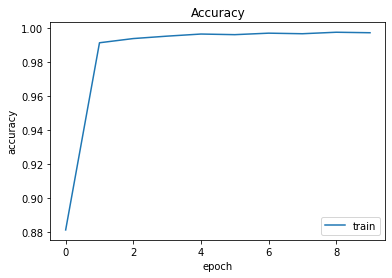

In [23]:
#view training history
plt.plot(his.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'])

In [24]:
test_labels = testset['label'].values
testset.drop('label', axis = 1, inplace = True)
test_images = testset.values
test_images = np.array([to_gray_image(i) for i in test_images])
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images / 255
test_images = test_images.reshape(test_images.shape[0], 28, 28, 3)
y_pred = model.predict(test_images)

In [25]:
#get accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.9167596207473508

In [26]:
#function to match labels with letters
def getLetters(result):
  classLabels = {0: 'A',
                 1: 'B',
                 2: 'C',
                 3: 'D',
                 4: 'E',
                 5: 'F',
                 6: 'G',
                 7: 'H',
                 8: 'I',
                 9: 'J',
                 10: 'K',
                 11: 'L',
                 12: 'M',
                 13: 'N',
                 14: 'O',
                 15: 'P',
                 16: 'Q',
                 17: 'R',
                 18: 'S',
                 19: 'T',
                 20: 'U',
                 21: 'V',
                 22: 'W',
                 23: 'X',
                 24: 'Y',
                 25: 'Z'}
  try:
    res = int(result)
    return classLabels[res]
  except:
    return "Error"
    


In [27]:
def check_left_hand(cap):
    if not cap.isOpened():
      print ("Could not open cam")
      exit()
    while True:
        ret , frame = cap.read()
        frame = cv2.flip(frame , 1)
        roi = frame[100:400, 30:320]
        cv2.imshow('roi' , roi)
        roi = cv2.cvtColor(roi  , cv2.COLOR_BGR2GRAY)
        roi = cv2.resize(roi , (28 , 28) , interpolation= cv2.INTER_AREA)
        cv2.imshow('roi is printed into gray' , roi)
        new_roi = im.fromarray(roi)
        new_roi.save("roi.png")
        roi = cv2.imread("roi.png")
        roi = roi / 255
        roi = roi.reshape(1 , 28 , 28 , 3)
        copy = frame.copy()
        cv2.rectangle(copy ,(30 , 100 ), (320 , 400), (255, 0,0) , 5)
        captured_image= model.predict(roi ,1, verbose =0)
        result = labelbinarizer.inverse_transform(np.array(captured_image.round() , dtype = np.int32))
        cv2.putText(copy , getLetters(result) , (300 , 100) , cv2.FONT_HERSHEY_COMPLEX , 2 , (0,255,0) , 2)
        cv2.imshow('frame' , copy)
        if cv2.waitKey(1) == 13:
            break

In [28]:
def check_right_hand(cap):
    if not cap.isOpened():
        print("Could not open cam")
        exit()
    while True:
        ret , frame = cap.read()
        frame = cv2.flip(frame , 1)
        roi = frame[100:400 , 320:620]
        cv2.imshow('roi' , roi)
        roi = cv2.cvtColor(roi , cv2.COLOR_BGR2GRAY)
        roi = cv2.resize(roi , (28 , 28) , interpolation = cv2.INTER_AREA)
        cv2.imshow('roi is printed into gray' , roi)
        new_roi = cv2.flip(roi  , 1)
        new_roi = im.fromarray(new_roi)
        new_roi.save("roi.png")
        roi = cv2.imread("roi.png")
        roi = roi / 255
        roi = roi.reshape(1 , 28 , 28 , 3)
        copy = frame.copy()
        cv2.rectangle(copy , (320 , 100) ,(620 , 400) ,  (255, 0,0) , 5)
        captured_image = model.predict(roi , 1 , verbose =0)
        result = labelbinarizer.inverse_transform(np.array(captured_image.round() , dtype = np.int32))
        cv2.putText(copy , getLetters(result) , (300 , 100) , cv2.FONT_HERSHEY_COMPLEX , 2 , (0,255,0) , 2)
        cv2.imshow('frame' , copy)
        if cv2.waitKey(1) == 13:
            
            break

In [29]:
import cv2 
import numpy as np
from PIL import Image as im
from sklearn.preprocessing import LabelBinarizer
TAY = 0
cap = cv2.VideoCapture(0)
if TAY == 0:#CHECK LEFT HAND
    check_left_hand(cap)
else:#CHECK RIGHT HAND
    check_right_hand(cap)
cap.release()
cv2.destroyAllWindows()